In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [2]:
airbnb = pd.read_excel('Airbnb.xlsx')
airbnb.head(5)

,id,name,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,...,beds,amenities,price,minimum_nights,availability_60,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,within a day,0.75,0.23,f,9.0,t,...,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",175.0,30,0,49,2022-06-21,4.68,3,0.31
1,5178,Large Furnished Room Near B'way銆,Please don鈥檛 expect the luxury here just a bas...,"Theater district, many restaurants around here.",within a few hours,1.00,1.00,f,1.0,t,...,1.0,"[""Body soap"", ""Microwave"", ""Laundromat nearby""...",68.0,2,4,550,2022-08-22,4.23,1,3.39
2,80493,Cozy room in East Village with AC,This room is up three flights of stairs - it's...,"People are easy going here, they're not in suc...",within an hour,1.00,0.86,f,1.0,t,...,2.0,"[""Essentials"", ""Oven"", ""Cable TV"", ""Refrigerat...",55.0,2,0,207,2022-08-13,4.34,1,1.49
3,45936,Couldn't Be Closer To Columbia Uni,<b>The space</b><br />Hi and Thank you for che...,NaN,within a day,0.50,0.86,f,2.0,t,...,1.0,"[""Breakfast"", ""Cable TV"", ""Elevator"", ""Heating...",75.0,31,0,135,2022-07-11,4.65,1,0.95
4,5203,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,NaN,NaN,NaN,f,5.0,t,...,1.0,"[""Hair dryer"", ""Essentials"", ""Breakfast"", ""Ele...",75.0,2,0,118,2017-07-21,4.91,1,0.75


In [4]:
reviews = pd.read_csv('C:\\Users\zunke\OneDrive\桌面\python\exercise\Data Analytics\DA数据集\\reviews.csv')
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2539,55688172,2015-12-04,25160947,Peter,Great host
1,2539,97474898,2016-08-27,91513326,Liz,Nice room for the price. Great neighborhood. J...
2,2539,105340344,2016-10-01,90022459,Евгений,Very nice apt. New remodeled.
3,2539,133131670,2017-02-20,116165195,George,Great place to stay for a while. John is a gre...
4,2539,138349776,2017-03-19,118432644,Carlos,.


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064458 entries, 0 to 1064457
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1064458 non-null  int64 
 1   id             1064458 non-null  int64 
 2   date           1064458 non-null  object
 3   reviewer_id    1064458 non-null  int64 
 4   reviewer_name  1064453 non-null  object
 5   comments       1064251 non-null  object
dtypes: int64(3), object(3)
memory usage: 48.7+ MB


In [6]:
#filtering out reviews
reviews_1f = reviews[reviews['listing_id'].isin(airbnb['id'])]
reviews_1f.reset_index(drop=True, inplace=True)
reviews_1f

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...
...,...,...,...,...,...,...
378103,54397475,636147860344032313,2022-05-27,50410366,Jack,Great stay! Easy access to the subway and such...
378104,54397475,641947905710847702,2022-06-04,34291390,Laura,"Youngsoo’s airbnb is great, I recommend it. Ve..."
378105,54397475,647083644109793592,2022-06-11,10806232,Daniel,"Spacious, clean and well equipped apartment. T..."
378106,54397475,657943473894479361,2022-06-26,340177981,Dereck,"The place is perfect: confortable, spacious, c..."


In [7]:
#filtering out english reviews
from langdetect import detect

def get_en_reviews(x):
    try:
        return detect(x)
    except:
        return None
reviews_2f = reviews_1f[reviews_1f['comments'].progress_apply(get_en_reviews) == 'en']
reviews_2f.head(5)

100%|██████████| 378108/378108 [19:27<00:00, 323.88it/s]


,listing_id,id,date,reviewer_id,reviewer_name,comments
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...
5,2595,1238204,2012-05-07,1783688,Sergey,Hi to everyone!\r<br/>Would say our greatest c...
6,2595,1293632,2012-05-17,1870771,Loïc,"Jennifer was very friendly and helpful, and he..."


In [8]:
reviews_2f.reset_index(drop=True, inplace=True)
reviews_2f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332893 entries, 0 to 332892
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     332893 non-null  int64 
 1   id             332893 non-null  int64 
 2   date           332893 non-null  object
 3   reviewer_id    332893 non-null  int64 
 4   reviewer_name  332892 non-null  object
 5   comments       332893 non-null  object
dtypes: int64(3), object(3)
memory usage: 15.2+ MB


In [9]:
testing = reviews_2f.loc[0:100]
testing

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
1,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
2,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...
3,2595,1238204,2012-05-07,1783688,Sergey,Hi to everyone!\r<br/>Would say our greatest c...
4,2595,1293632,2012-05-17,1870771,Loïc,"Jennifer was very friendly and helpful, and he..."
...,...,...,...,...,...,...
96,5178,222545,2011-04-11,327452,Giannina,shun is a great host and the place is great i ...
97,5178,229542,2011-04-18,351554,Roger,Room is exactly as described. Very clean and l...
98,5178,244045,2011-04-29,335908,James,great time. Shun welcomed me and helped with m...
99,5178,263586,2011-05-15,299564,Zrinka,Our stay at this accomodation was very pleasen...


In [10]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index += 1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words, negative_words


In [11]:
from nltk import word_tokenize

def count_words(comment):
    pos = neg = 0
    for word in word_tokenize(comment):
        if word in positive_words:
            pos += 1
        if word in negative_words:
            neg += 1

    return "{0:1.2f}% {1:1.2f}%".format(pos / len(word_tokenize(comment)) * 100,
                                    neg / len(word_tokenize(comment)) * 100)


In [12]:
testing_list = []
for i in range(len(testing['comments'])):
    pair = (testing['listing_id'][i], testing['comments'][i])
    testing_list.append(pair)

comment_list = []
for i in range(len(reviews_2f['comments'])):
    pair = (reviews_2f['listing_id'][i], reviews_2f['comments'][i])
    comment_list.append(pair)
comment_list

[(2595,
  "I've stayed with my friend at the Midtown Castle for six days and it was a lovely place to be. A big spacious room with a pointy roof, which really makes you feel like staying in a castle. The location is perfect. It is just a few steps from Macy's Time Square and Theatre District. Everything worked just perfect with the keys etc. Thank you so much Jennifer, we had a great time in New York.\r<br/>Attention: it's on the 4th floor without a lift :-) but definetely worth it!"),
 (2595,
  "We've been staying here for about 9 nights, enjoying to be in the center of the city, that never sleeps...short ways to everywhere in Manhattan, by subway or by walk. Midtown castle is a beauftiful and tastful place, Jennifer and Tori relaxed and friendly hosts - thats why we - the three Berliners - recommand that place! Good to have WiFi and a little kitchen too!"),
 (2595,
  "We had a wonderful stay at Jennifer's charming apartment! They were very organized and helpful; I would definitely re

In [16]:
def sentiment_analysis(list, debug=False):
    positive_words, negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = []
    for text in list:
        pos = neg = 0
        for word in word_tokenize(text[1]):
            if word in positive_words:
                if debug:
                    print("Positive", word)
                pos += 1
            if word in negative_words:
                if debug:
                    print("Negative", word)
                neg += 1
        results.append((text[0], pos / len(word_tokenize(text[1])), neg / len(word_tokenize(text[1]))))
    return results


In [17]:
result_list = sentiment_analysis(comment_list)

In [29]:
difference = []
for result in result_list:
    diff = result[1] - result[2]
    difference.append((result[0], diff))

len(difference)
len(comment_list)

332893

In [32]:
# pos_reviews = [score for score in difference if score[1]>0]
# neg_reviews = [score for score in difference if score[1]<0]
pos_reviews = []
neg_reviews = []

for i, comments in enumerate(comment_list):
    if difference[i][1] > 0:
        result = comment_list[i] + (difference[i][1],)
        pos_reviews.append(result)
    elif difference[i][1] < 0:
        result = comment_list[i] + (difference[i][1],)
        neg_reviews.append(result)
print(len(pos_reviews))
print(len(neg_reviews))
pos_reviews[0]

294090
6287


(2595,
 "I've stayed with my friend at the Midtown Castle for six days and it was a lovely place to be. A big spacious room with a pointy roof, which really makes you feel like staying in a castle. The location is perfect. It is just a few steps from Macy's Time Square and Theatre District. Everything worked just perfect with the keys etc. Thank you so much Jennifer, we had a great time in New York.\r<br/>Attention: it's on the 4th floor without a lift :-) but definetely worth it!",
 0.07407407407407407)

In [36]:
from nltk import sent_tokenize,word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [52]:
lda_pos_list = [review[1] for review in pos_reviews]
lda_neg_list = [review[1] for review in neg_reviews]

def lda_model(list, num_topics=5, passes=10):

    for i in range(len(list)):
        review = list[i]
        sents = sent_tokenize(review)
        for j in range(len(sents)):
            sent = sents[j]
            sent = sent.strip().replace('\n','')
            sents[j] = sent
        list[i] = '. '.join(sents)

    texts = [[word for word in story.lower().split()
            if word not in STOPWORDS and word.isalnum()]
             for story in list]

    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

    return lda


In [40]:
lda_model(lda_pos_list) #5 topic

[   (   0,
        '0.039*"great" + 0.030*"stay" + 0.029*"place" + 0.028*"perfect" + '
        '0.026*"location" + 0.026*"apartment" + 0.013*"view" + '
        '0.012*"located"'),
    (   1,
        '0.037*"subway" + 0.033*"close" + 0.027*"walk" + 0.024*"great" + '
        '0.016*"walking" + 0.016*"central" + 0.016*"apartment" + 0.015*"good"'),
    (   2,
        '0.021*"stay" + 0.021*"new" + 0.020*"like" + 0.017*"airbnb" + '
        '0.017*"place" + 0.014*"best" + 0.014*"time" + 0.011*"felt"'),
    (   3,
        '0.036*"room" + 0.013*"small" + 0.013*"good" + 0.011*"bed" + '
        '0.011*"hotel" + 0.010*"bathroom" + 0.009*"rooms" + 0.009*"nice"'),
    (   4,
        '0.126*"great" + 0.054*"place" + 0.052*"stay" + 0.048*"location" + '
        '0.042*"clean" + 0.028*"nice" + 0.026*"definitely" + 0.024*"super"')]


In [41]:
lda_model(lda_neg_list) #5 topic

[   (   0,
        '0.016*"expect" + 0.007*"hidden" + 0.007*"mates" + 0.006*"chill" + '
        '0.005*"tryna" + 0.005*"nyc" + 0.005*"rent" + 0.004*"feet"'),
    (   1,
        '0.008*"la" + 0.007*"que" + 0.006*"solid" + 0.006*"y" + 0.005*"u" + '
        '0.005*"parking" + 0.005*"garage" + 0.004*"en"'),
    (   2,
        '0.019*"room" + 0.013*"apartment" + 0.013*"bathroom" + 0.011*"bed" + '
        '0.010*"dirty" + 0.008*"like" + 0.008*"place" + 0.008*"shower"'),
    (   3,
        '0.032*"great" + 0.024*"place" + 0.021*"location" + 0.016*"good" + '
        '0.015*"apartment" + 0.015*"stay" + 0.013*"little" + 0.012*"room"'),
    (   4,
        '0.015*"host" + 0.015*"airbnb" + 0.012*"stay" + 0.010*"room" + '
        '0.009*"check" + 0.009*"place" + 0.008*"told" + 0.008*"day"')]


In [53]:
lda_pos = lda_model(lda_pos_list,num_topics=4)


In [54]:
lda_neg = lda_model(lda_neg_list,num_topics=4)

In [55]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda_pos.print_topics(num_words=8))

[   (   0,
        '0.029*"great" + 0.027*"close" + 0.024*"subway" + 0.022*"apartment" + '
        '0.020*"location" + 0.019*"walk" + 0.016*"walking" + 0.016*"central"'),
    (   1,
        '0.129*"great" + 0.054*"place" + 0.051*"stay" + 0.049*"location" + '
        '0.042*"clean" + 0.026*"nice" + 0.025*"definitely" + 0.024*"super"'),
    (   2,
        '0.031*"room" + 0.013*"hotel" + 0.011*"good" + 0.011*"staff" + '
        '0.010*"small" + 0.009*"bed" + 0.009*"bathroom" + 0.008*"like"'),
    (   3,
        '0.028*"stay" + 0.024*"place" + 0.021*"new" + 0.017*"best" + '
        '0.014*"apartment" + 0.013*"like" + 0.013*"definitely" + '
        '0.012*"amazing"')]


In [56]:
pp.pprint(lda_neg.print_topics(num_words=8))

[   (   0,
        '0.018*"dirty" + 0.014*"room" + 0.013*"bed" + 0.009*"like" + '
        '0.008*"kitchen" + 0.008*"floor" + 0.008*"apartment" + '
        '0.007*"smelled"'),
    (   1,
        '0.007*"views" + 0.006*"expect" + 0.005*"house" + 0.005*"check" + '
        '0.004*"prime" + 0.004*"view" + 0.004*"parking" + '
        '0.003*"transportation"'),
    (   2,
        '0.012*"room" + 0.012*"host" + 0.011*"airbnb" + 0.010*"stay" + '
        '0.009*"place" + 0.009*"apartment" + 0.007*"check" + 0.006*"door"'),
    (   3,
        '0.024*"great" + 0.019*"place" + 0.017*"location" + 0.015*"room" + '
        '0.014*"good" + 0.014*"apartment" + 0.012*"stay" + 0.010*"noise"')]


In [57]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue

        freq = int(prob/prob_total*100)
        alist=[word]
        word_list.extend(alist*freq)

    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
    shuffle(word_list)
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)

    return None

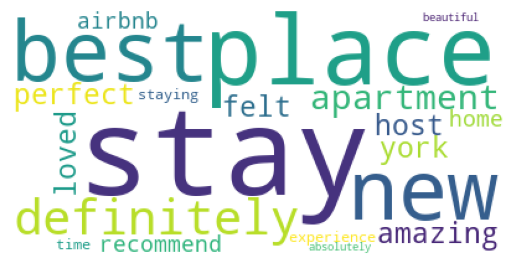

In [60]:
draw_wordcloud(lda_pos, 3)

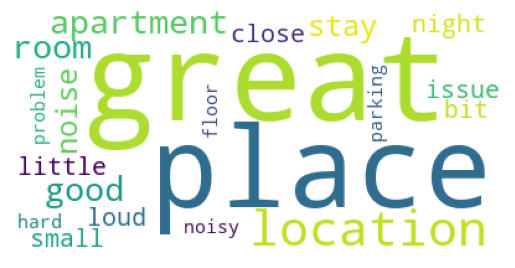

In [61]:
draw_wordcloud(lda_neg,3)

In [62]:
neg_reviews

[(5178,
  "As Shun has advertised, it's a very basic, no-frills room. Good value for the location! Shun was polite and we had no issues with him as far as timing/picking up keys/communication was concerned.  ",
  -0.02564102564102564),
 (5178,
  "We've already stayed five times with airbnb and this was definitely the worst!\r<br/>The bedroom smells, the bed and the pillows are horribly uncomfortable, it's loud.\r<br/>The bathroom is a bit dirty, it smells of mildew and on the shower curtain there is a lot of mildew!!\r<br/>The host let you feel unwanted,he doesn't want you to use the kitchen and isn't helpful at all.\r<br/>The location isn't bad for that money, but if you can afford more don't stay here.",
  -0.05405405405405406),
 (5178,
  "My first experience with Airbnb in this apartment in Manhattan turned out to be a nightmare. As the host had told us, he or she (we never got to know their gender) would not be at the apt when we arrived. Instead, we were given the keys and some in

In [59]:
lda_pos.show_topic(0)

[('great', 0.02875394),
 ('close', 0.027040388),
 ('subway', 0.023857169),
 ('apartment', 0.021542057),
 ('location', 0.019931063),
 ('walk', 0.019043954),
 ('walking', 0.016255602),
 ('central', 0.015587541),
 ('place', 0.014423692),
 ('restaurants', 0.01331983)]